# Exploración del Dataset FIFA

Este notebook explora el dataset limpio de jugadores FIFA generado por el pipeline.

## Librerías

In [51]:
import pandas as pd
import missingno as msno
import numpy as np

## 1. Importar bibliotecas necesarias

In [3]:
videogames = pd.read_csv('../data/games.csv')

## 2. Cargar el dataset limpio

In [ ]:
videogames.dtypes

## 3. Exploración inicial del dataset

In [ ]:
videogames.columns

In [ ]:
videogames.rename(columns={'Name':'Videogame_Name'}, inplace=True)

In [ ]:
videogames.head()

In [ ]:
# Información general del dataset
videogames.info()

In [ ]:
# Forma del dataset (filas, columnas)
print(f"Forma del dataset: {videogames.shape}")
print(f"Total de jugadores: {videogames.shape[0]:,}")
print(f"Total de columnas: {videogames.shape[1]}")

In [ ]:
# Estadísticas descriptivas
videogames.describe()

In [ ]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(videogames.isnull().sum())

In [4]:
print(videogames.nunique())
print()
print(len(videogames))

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

16715


In [5]:
videogames.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
type(videogames.isnull().sum())

pandas.core.series.Series

In [10]:
videogames.isnull().sum().info()

<class 'pandas.core.series.Series'>
Index: 11 entries, Name to Rating
Series name: None
Non-Null Count  Dtype
--------------  -----
11 non-null     int64
dtypes: int64(1)
memory usage: 476.0+ bytes


In [11]:
videogames.isnull().sum().["Rating_ESRB"]

SyntaxError: invalid syntax (2563107580.py, line 1)

In [6]:
type(videogames)

pandas.core.frame.DataFrame

In [8]:
type(videogames["Platform"])

pandas.core.series.Series

In [12]:
valores_unicos = videogames.nunique()

In [17]:
datos_generales = pd.DataFrame([
    {"Valores únicos por columna": valores_unicos,
    "Nulos": videogames.isnull()}
])

datos_generales

,Valores únicos por columna,Nulos
0,Name 11559 Platform ...,Name Platform Year_of_Release Genre...


In [18]:
len(videogames)

16715

In [19]:
videogames.isnull()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
16710,False,False,False,False,False,False,False,False,True,True,True
16711,False,False,False,False,False,False,False,False,True,True,True
16712,False,False,False,False,False,False,False,False,True,True,True
16713,False,False,False,False,False,False,False,False,True,True,True


In [20]:
videogames.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Valores Ausentes

In [21]:
videogames.isnull().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [22]:
videogames.isnull().mean()*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [24]:
round(videogames.isnull().mean()*100, 3)

Name                0.012
Platform            0.000
Year_of_Release     1.609
Genre               0.012
NA_sales            0.000
EU_sales            0.000
JP_sales            0.000
Other_sales         0.000
Critic_Score       51.319
User_Score         40.090
Rating             40.479
dtype: float64

## Graficos

<Axes: >

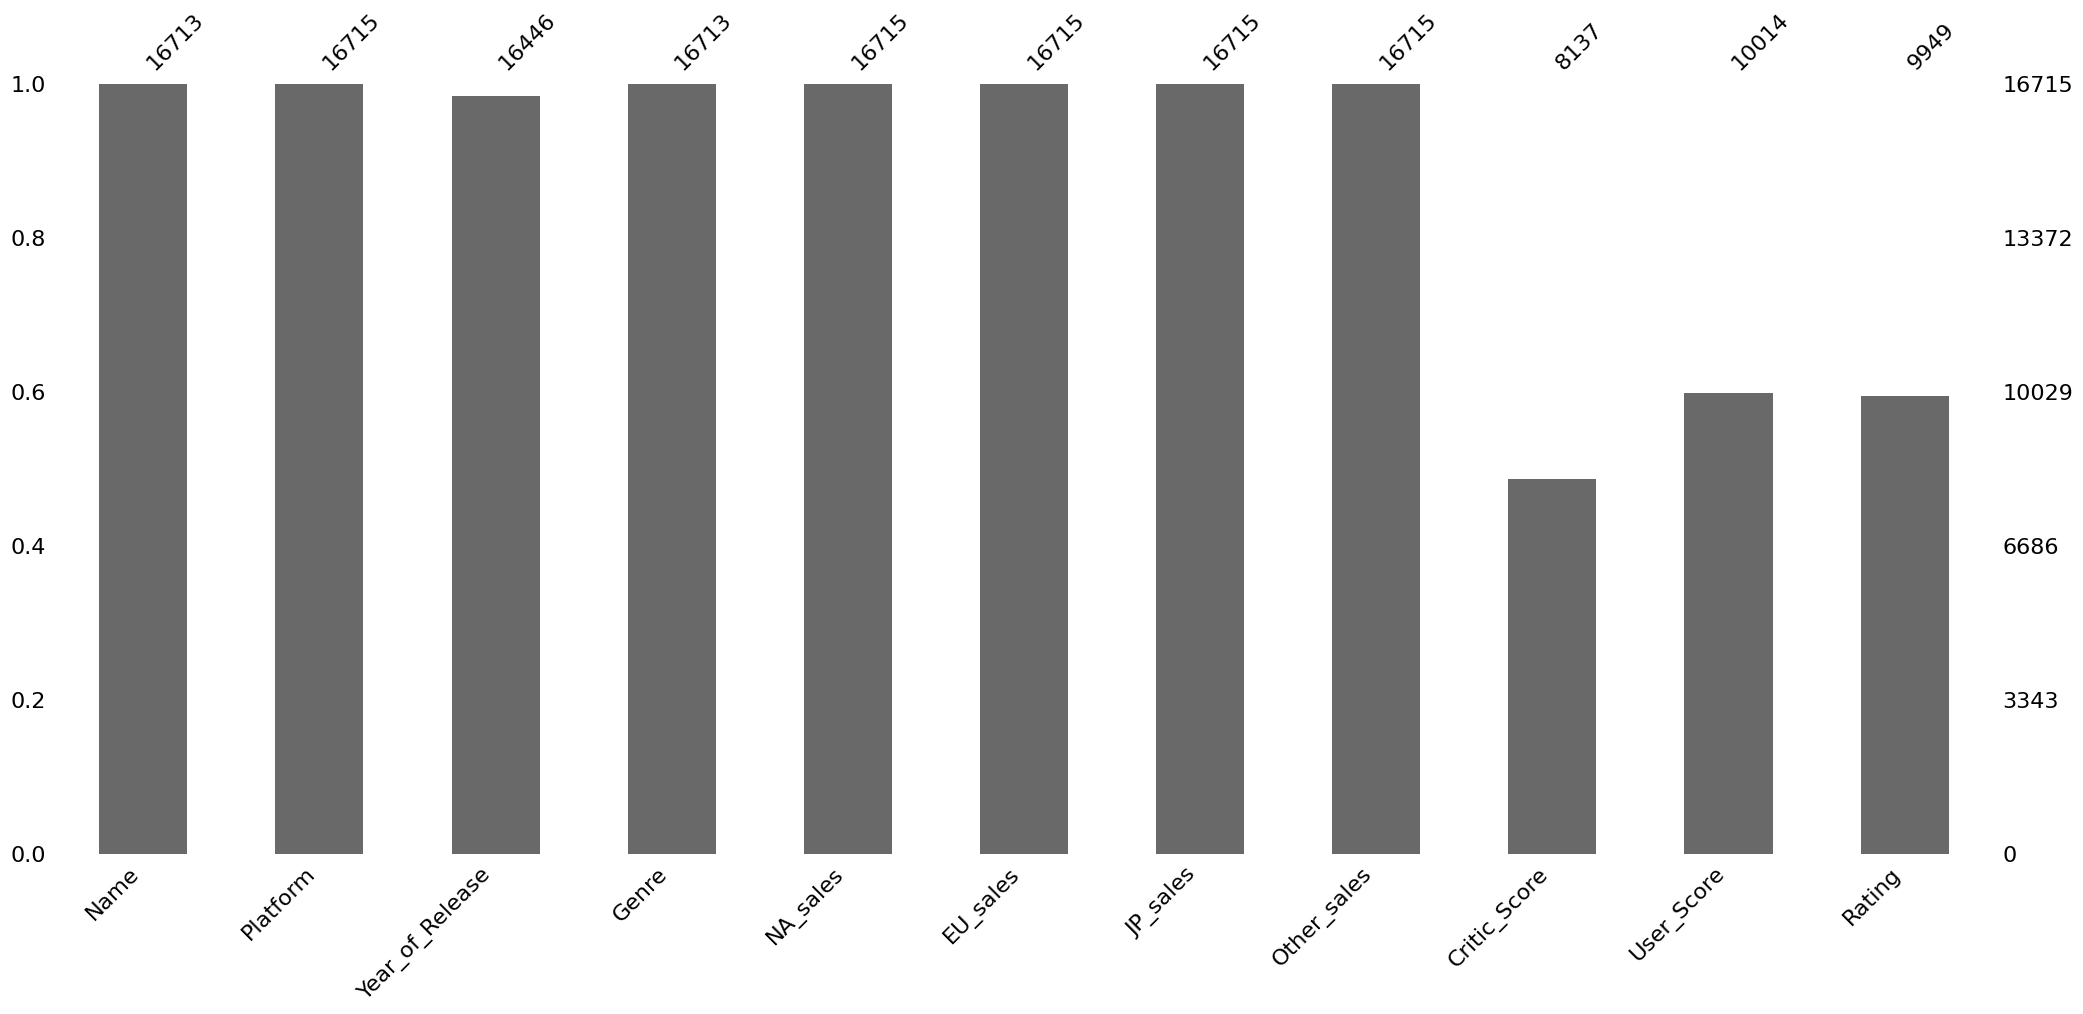

In [26]:
msno.bar(videogames)

Cantida de valore ausentes grafico visual

<Axes: >

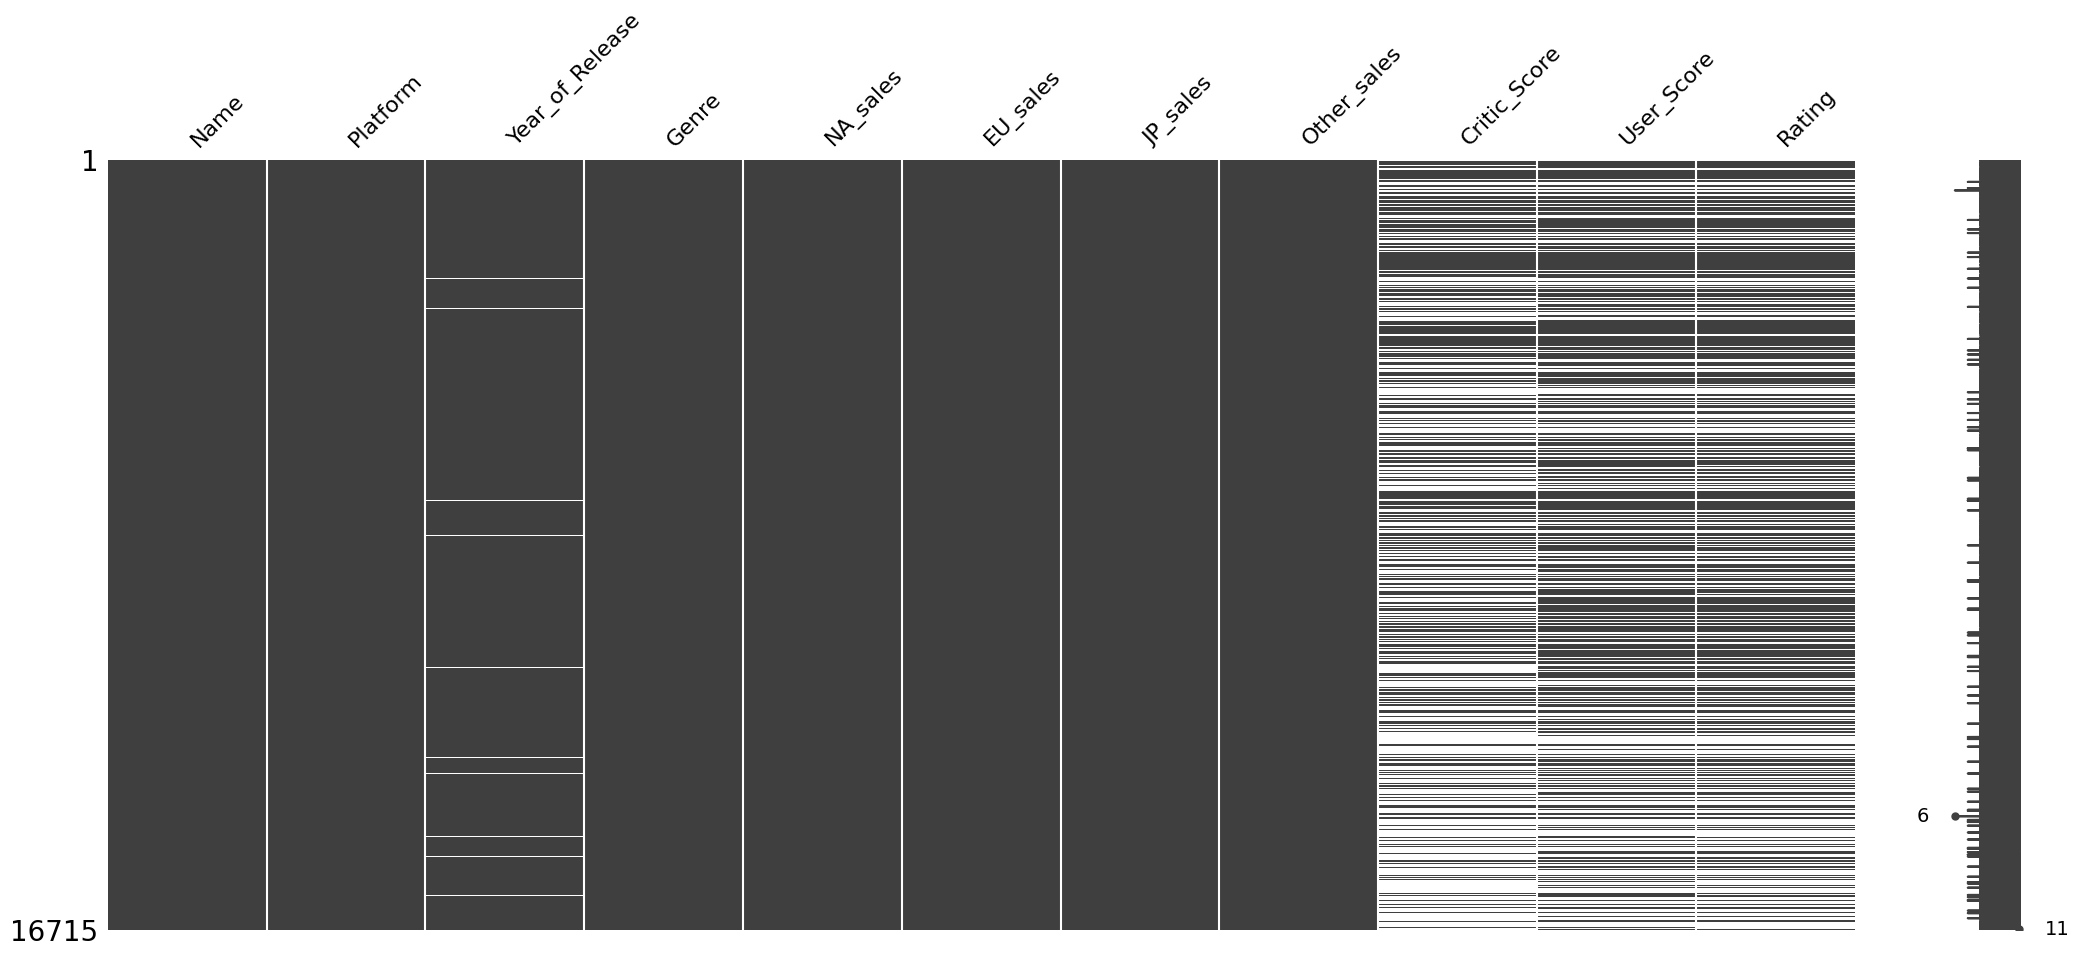

In [27]:
msno.matrix(videogames)

<Axes: >

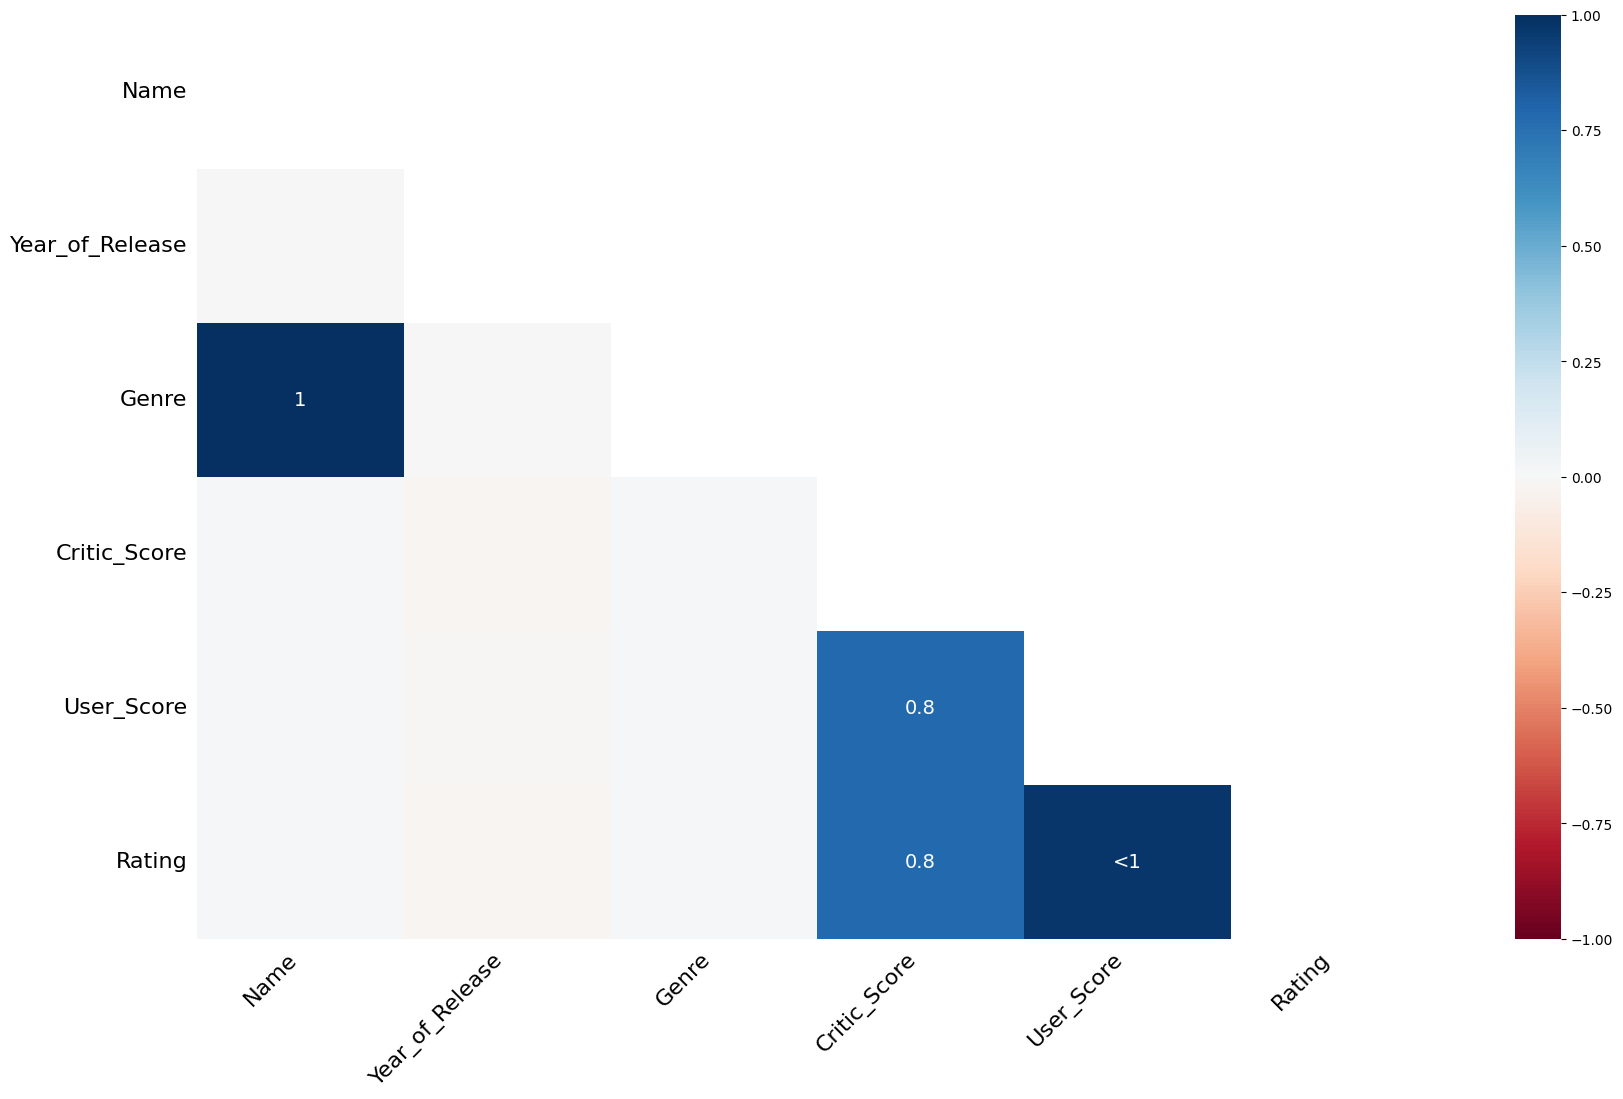

In [28]:
msno.heatmap(videogames)

Cinteo total de datos categoricos o numericos

In [29]:
videogames["Genre"].value_counts()  

Genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [30]:
videogames["Genre"].value_counts(normalize=True) * 100

Genre
Action          20.157961
Sports          14.048944
Misc            10.470891
Role-Playing     8.963083
Shooter          7.915994
Adventure        7.796326
Racing           7.473224
Platform         5.313229
Simulation       5.223479
Fighting         5.079878
Strategy         4.086639
Puzzle           3.470352
Name: proportion, dtype: float64

Automatizacion del codigo value_counts()

In [32]:
videogames.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

## importante ejecutar esto

In [36]:
for columna in videogames.columns:
    print(f"Columna: {columna}")
    print(videogames[columna].value_counts(normalize=False) * 100)
    print()

Columna: Name
Name
Need for Speed: Most Wanted                                                       1200
FIFA 14                                                                            900
Ratatouille                                                                        900
LEGO Marvel Super Heroes                                                           900
Madden NFL 07                                                                      900
                                                                                  ... 
Fujiko F. Fujio Characters: Great Assembly! Slightly Fantastic Slapstick Party     100
Super Robot Taisen: Original Generation                                            100
Sugar + Spice! Anoko no Suteki na Nanimokamo                                       100
Kanokon: Esuii                                                                     100
Haitaka no Psychedelica                                                            100
Name: count, Length: 115

reset_index( se restea el inidce y se va como columna al df)

In [39]:
(videogames["Genre"].value_counts(normalize=True) * 100).reset_index()

,Genre,proportion
0,Action,20.157961
1,Sports,14.048944
2,Misc,10.470891
3,Role-Playing,8.963083
4,Shooter,7.915994
5,Adventure,7.796326
6,Racing,7.473224
7,Platform,5.313229
8,Simulation,5.223479
9,Fighting,5.079878


# explorar como esta la bd

In [41]:
(videogames["Genre"].value_counts(normalize=True) * 100).reset_index().sort_values(by="Genre", ascending=True)

,Genre,proportion
0,Action,20.157961
5,Adventure,7.796326
9,Fighting,5.079878
2,Misc,10.470891
7,Platform,5.313229
11,Puzzle,3.470352
6,Racing,7.473224
3,Role-Playing,8.963083
4,Shooter,7.915994
8,Simulation,5.223479


## resumen estadiis tidoc .describe() como cja ay vigote media cuartil promedio media

In [42]:
videogames.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [43]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [47]:
categorical_data = videogames.select_dtypes(include=['object'])
categorical_data.describe()

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [48]:
numerical_data = videogames.select_dtypes(include=['float64', 'int64'])

ambair datoa  una columna

In [ ]:
videogames["year_of_release"].

## limpiando la columna User_Score

In [50]:
videogames["User_Score"].value_counts(dropna=False)

User_Score
NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 97, dtype: int64

In [52]:
videogames["User_Score"] = videogames["User_Score"].replace('tbd', np.nan)

In [53]:
videogames["User_Score"].value_counts(dropna=False)

User_Score
NaN    9125
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [ ]:
crear una funcion data cleaner y que limpie las columnas y que refresquen los tipos de datos